In [3]:
# Imports
import qutip as qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip.control.pulseoptim as cpo
import qutip.logging_utils as logging
import scipy.optimize as spopt
import scipy as sp

In [7]:
# Constants
h_bar = 1

cavity_levels = 6

# Basic operators
# Atom(a and a-dagger)
a = qt.tensor(qt.destroy(2), qt.qeye(cavity_levels))
ad = a.dag()
# Cavity(c, c-dagger, and sigmaZ)
c = qt.tensor(qt.qeye(2), qt.destroy(cavity_levels))
cd = c.dag()

# Simulation time and accuracy details
num_time_steps = 50  # Number of time states for the simulation
total_time = 5  # Total simulation time
dt = total_time/num_time_steps  # Time step size
times = np.linspace(0.0, total_time, num_time_steps)  # Time space array
num_grape_iter = 50
# Frequencies
w_a = 1  # Atom(qubit) frequency
w_c = 1  # Cavity frequency
g = 1  # Linear photon number dependent dispersive shifts

# Hamiltonians (Linear/Harmonic)
H_a = w_a*a*ad  # Atom hamiltonian
H_c = w_c*c*cd  # Cavity hamiltonian
H_ac = g * (cd * a + c * ad)  # Atom-Cavity interaction hamiltonian
H0 = H_a + H_c + H_ac  # Full atom-cavity hamiltonian w/o a derive
# Drive hamiltonians
# Atom
Ha_I = a + ad
Ha_Q = 1j*(a-ad)
# Cavity
Hc_I = c + cd
Hc_Q = 1j*(c-cd)
# Time dependent(controllable) derive hamiltonian list
H_d = [Ha_I, Ha_Q, Hc_I, Hc_Q]

In [10]:
def get_drive_fields_grape(atom_operator, cavity_operator, disp_graphs=False):
    # Target state
    targ = qt.tensor(atom_operator, cavity_operator)

    result = qt.control.grape_unitary(targ, H0, H_d, num_grape_iter, times)

    # Atom(transmon)
    QI_a = result.u[-1, 0, :]
    QQ_a = result.u[-1, 1, :]
    # Cavity
    QI_c = result.u[-1, 2, :]
    QQ_c = result.u[-1, 3, :]

    # Display drive graphs
    if disp_graphs:
        fig, (ax1, ax2) = plt.subplots(2, 1)

        ax1.set_title("Transmon Drive Fields")
        ax1.plot(times, QI_a, 'r')
        ax1.plot(times, QQ_a, 'r--')
        ax1.legend(("I", "Q"))
        ax1.set_xlabel('Time (sec)')
        ax1.set_ylabel('Amplitude')

        ax2.set_title("Cavity Drive Fields")
        ax2.plot(times, QI_c, 'b')
        ax2.plot(times, QQ_c, "b--")
        ax2.legend(("I", "Q"))
        ax2.set_xlabel('Time (sec)')
        ax2.set_ylabel('Amplitude')
        plt.show()

    return QI_a, QQ_a, QI_c, QQ_c

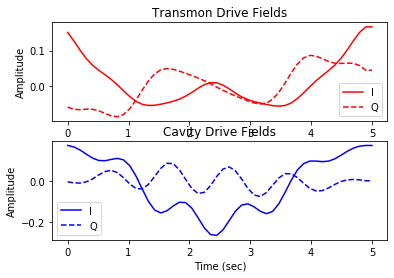

In [18]:
QI_a, QQ_a, QI_c, QQ_c = get_drive_fields_grape(qt.sigmax(),
                                                qt.qeye(cavity_levels),
                                                disp_graphs=True)

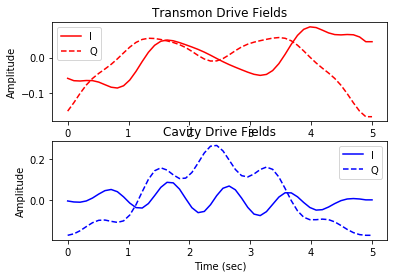

In [19]:
QI_a, QQ_a, QI_c, QQ_c = get_drive_fields_grape(qt.sigmay(),
                                                qt.qeye(cavity_levels),
                                                disp_graphs=True)